1.1 Biến đổi cường độ ảnh từ tối sang sáng và ngược lại

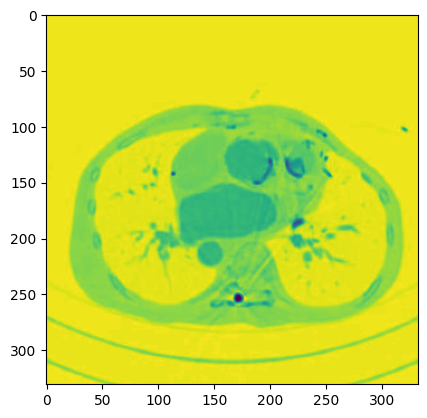

In [7]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('world_cup.png').convert('L')

im_1 = np.asarray(img)

im_2 = 255 - im_1

new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img)
plt.show()

1.2 Thay đổi chất lượng ảnh với Power law (Gamma-Correction)    

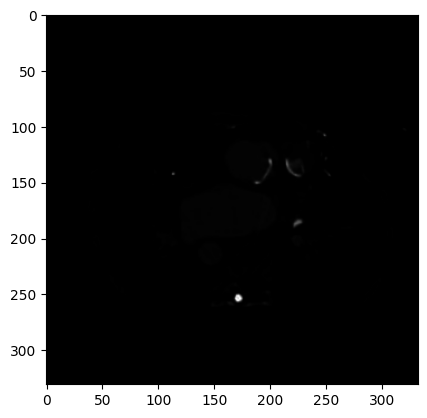

In [8]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('world_cup.png').convert('L')
im_1 = np.asarray(img)
gamma = 5
b1 = im_1.astype(float)
b2 = np.max(b1)
b3 = b1 / b2
b2 = np.log(b3)*gamma
c = np.exp(b2) * 255.0
c1 = c.astype(int)
d = Image.fromarray(c1)
img.show
d.show()
plt.imshow(d)
plt.show()

1.3 Thay đổi cường độ điểm ảnh với Log Transformation

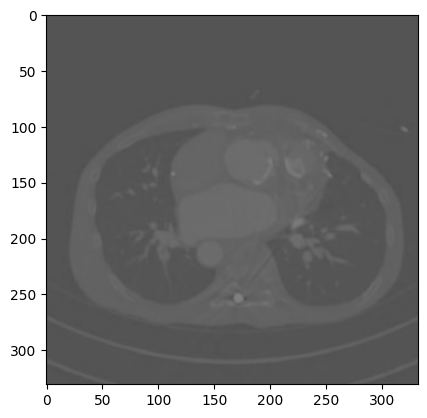

In [9]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('world_cup.png').convert('L')
im_1 = np.asarray(img)
b1 = im_1.astype(float)
b2 = np.max(b1)
c = (128.0 * np.log(1 + b1))/np.log(1+b2)
c1 = c.astype(int)
d = Image.fromarray(c1)
img.show()  
d.show()
plt.imshow(d)
plt.show()

1.4 Histogram equalization

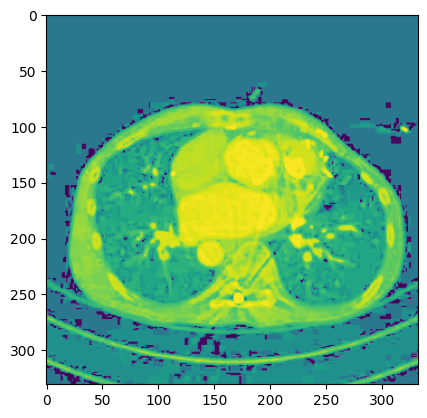

In [10]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('world_cup.png').convert('L')
im1 = np.asarray(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255 
den_cdf_m = cdf_m.max() - cdf_m.min()
cdf_m = num_cdf_m / den_cdf_m

cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[im1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

1.5 Thay đổi ảnh với Contrast Stretching

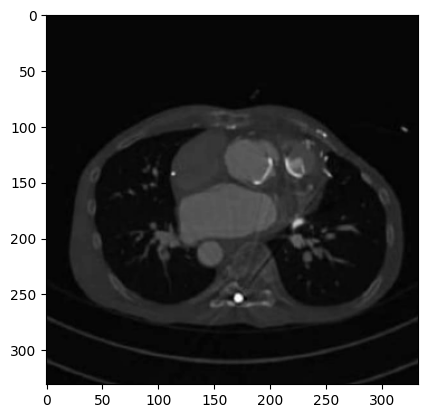

In [12]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('world_cup.png').convert('L')
im_1 = np.asarray(img)
b = im1.max()
a = im1.min()
c = im1.astype(float)
im2 = 255*(c-a)/(b-a)
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6 Biến đổi Fourier

1.6.1 Biến đổi ảnh với Fast Fourier

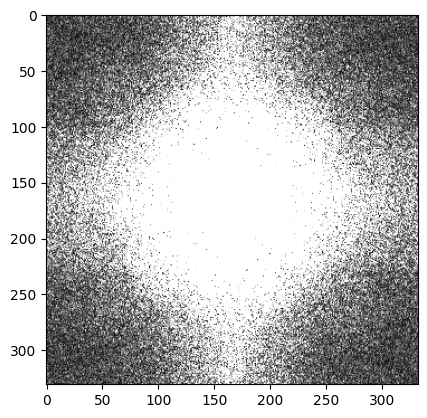

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.fftpack

img = Image.open('world_cup.png').convert('L')
im_1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im_1))
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.2. Lọc ảnh trong miền tần suất

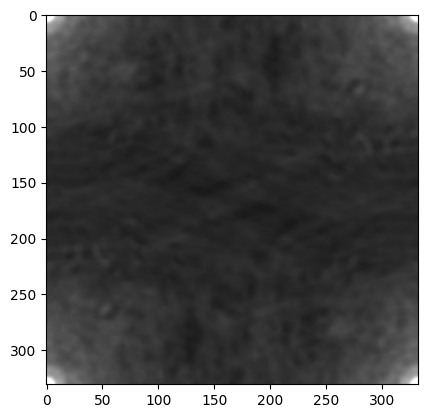

In [ ]:
from PIL import Image
import math
import scipy
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('world_cup.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H =np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2*t1
for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**t1)
H = H.astype(float)
H = Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)
img.show()
im3.show()
plt.imshow(im3)
plt.show()


Butterworth highpass Filter

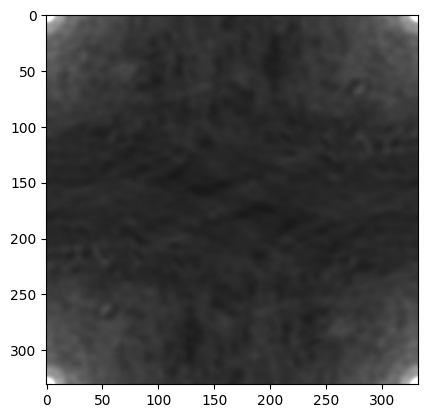

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
img = Image.open('world_cup.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**t2)

H = H.astype(float)
H = Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)
img.show()
im3.show()  
plt.imshow(im3)
plt.show()